# Jupiter's Notebook for Scenario 04
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), and [imbalanced-learn](https://imbalanced-learn.org/stable/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-04-Mixed-traffic.csv')

In [4]:
#check dimensions
df.shape

(306189, 52)

## Pre-feature selection

In [5]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [6]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [7]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    306189
srcIP                  11689
srcPrt                 55439
dstIP                  10472
dstPrt                   253
flowduration          187275
total_fpackets           757
total_bpackets           955
total_fpktl             8786
total_bpktl            17519
min_fpktl                129
min_bpktl                496
max_fpktl               1295
max_bpktl                952
mean_fpktl             16481
mean_bpktl             20690
std_fpktl              27150
std_bpktl              25898
total_fipt             76284
total_bipt             59794
min_fipt               41025
min_bipt               20208
max_fipt               74006
max_bipt               54941
mean_fipt              73547
mean_bipt              58506
std_fipt               60371
std_bipt               52206
fpsh_cnt                 152
bpsh_cnt                 396
furg_cnt                   1
burg_cnt                   1
total_fhlen             3197
total_bhlen   

In [8]:
#delete columns with a single unique value
#get the indexes of the single-valued columns
counts=df.nunique()
to_del=[i for i,v in enumerate(counts) if v==1]
print(to_del)
#drop unless columns
df.drop(df.columns[to_del],axis=1,inplace=True)
print(df.shape)

[31, 32, 47]
(306189, 49)


In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    306189
srcIP                  11689
srcPrt                 55439
dstIP                  10472
dstPrt                   253
flowduration          187275
total_fpackets           757
total_bpackets           955
total_fpktl             8786
total_bpktl            17519
min_fpktl                129
min_bpktl                496
max_fpktl               1295
max_bpktl                952
mean_fpktl             16481
mean_bpktl             20690
std_fpktl              27150
std_bpktl              25898
total_fipt             76284
total_bipt             59794
min_fipt               41025
min_bipt               20208
max_fipt               74006
max_bipt               54941
mean_fipt              73547
mean_bipt              58506
std_fipt               60371
std_bipt               52206
fpsh_cnt                 152
bpsh_cnt                 396
total_fhlen             3197
total_bhlen             4339
fPktsPerSecond        172894
bPktsPerSecond

In [10]:
#delete ts, srcIP and dstIP featrures
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

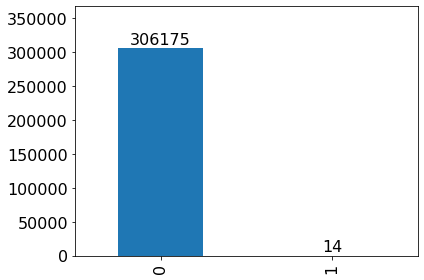

In [11]:
#Consider columns that have very few values, e.g. flow_cwr column
ax = df['flow_cwr'].value_counts().plot(kind='bar',fontsize=16) 
for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    w = p.get_width()
    ax.annotate(f'{h:.0f}\n', (x + w/2, h), ha='center', va='center', size=16)
plt.margins(y=0.2)
plt.tight_layout()
plt.show()

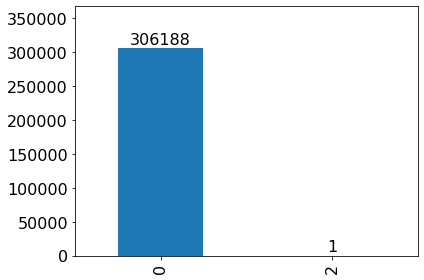

In [12]:
#Consider columns that have very few values, e.g. flow_cwr column
ax = df['flow_ece'].value_counts().plot(kind='bar',fontsize=16) 
for p in ax.patches:
    x = p.get_x()
    h = p.get_height()
    w = p.get_width()
    ax.annotate(f'{h:.0f}\n', (x + w/2, h), ha='center', va='center', size=16)
plt.margins(y=0.2)
plt.tight_layout()
plt.show()

In [13]:
#delete flow_ece column
df.drop('flow_cwr',axis=1,inplace=True)

In [14]:
#delete flow_cwr column
df.drop('flow_ece',axis=1,inplace=True)

In [15]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 305991, 1: 198})

In [16]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(306189, 44)
(303784, 44)


In [17]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 303587, 1: 197})

In [18]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio,label
0,TCP,12686,25,0.000014,1,1,62,54,62,54,...,58.000000,5.656854,0.000014,0.000000,0,1,1,1,0.870968,0
1,TCP,59694,80,8.593100,6,5,923,502,60,54,...,129.545455,175.829102,1.340874,2.130220,2,2,0,10,0.543879,0
2,TCP,54641,80,1.518976,7,6,682,2313,66,66,...,230.384615,393.028290,0.163290,0.264648,2,2,0,12,3.391496,0
3,TCP,11449,25,1.114772,3,3,186,162,62,54,...,58.000000,4.381781,0.222960,0.313212,0,3,3,3,0.870968,0
4,TCP,59695,80,14.950082,8,6,1676,1212,60,54,...,206.285714,260.677063,1.519740,2.568937,1,2,1,13,0.723150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306184,UDP,62204,53,0.270114,1,1,78,78,78,78,...,78.000000,0.000000,0.270114,0.000000,0,0,0,0,1.000000,0
306185,UDP,28571,53,0.000281,1,1,74,166,74,166,...,120.000000,65.053825,0.000281,0.000000,0,0,0,0,2.243243,0
306186,UDP,62218,53,0.000000,1,0,72,0,72,0,...,72.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0
306187,UDP,62219,53,0.000000,1,0,78,0,78,0,...,78.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0


In [19]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 303587 of 303784 (99.9%)
> Class 1 : 197 of 303784 (0.1%)


# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [20]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSecond        float64
flowPktsPerSecond     float64
flowBytesP

In [21]:
#create training and test dataset
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [22]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [23]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])

# transform the datasets
training_numeric_dataset = enc.fit_transform(X_train, y_train)
testing_numeric_dataset = enc.transform(X_test)

In [24]:
#show the coded features
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio
276663,0.000085,1.110137e-05,0.000009,0.000157,1,1,85,136,85,136,...,1.406588e+06,110.500000,36.062447,0.000157,0.000000,0,0,0,0,1.600000
1742,0.004191,2.927198e-05,0.000370,5.179779,24,24,1973,27273,66,66,...,5.646187e+03,609.291667,658.189392,0.212943,0.974687,2,2,0,47,13.823112
128139,0.000085,1.526141e-06,0.000009,3.464763,1,1,78,165,78,165,...,7.013467e+01,121.500000,61.518291,3.464763,0.000000,0,0,0,0,2.115385
250078,0.000085,2.927198e-05,0.000009,2.492490,1,1,77,77,77,77,...,6.178560e+01,77.000000,0.000000,2.492490,0.000000,0,0,0,0,1.000000
156656,0.000085,4.130930e-06,0.000009,0.000450,1,1,81,368,81,368,...,9.980088e+05,224.500000,202.939651,0.000450,0.000000,0,0,0,0,4.543210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120616,0.000085,1.110137e-05,0.000009,7.491007,1,1,76,158,76,158,...,3.123745e+01,117.000000,57.982758,7.491007,0.000000,0,0,0,0,2.078947
261043,0.000085,5.623148e-07,0.000009,0.898636,1,1,83,330,83,330,...,4.595854e+02,206.500000,174.655380,0.898636,0.000000,0,0,0,0,3.975904
132766,0.000085,5.623148e-07,0.000009,0.000265,1,1,72,164,72,164,...,8.901581e+05,118.000000,65.053825,0.000265,0.000000,0,0,0,0,2.277778
147818,0.000085,1.110137e-05,0.000009,1.584262,1,1,78,454,78,454,...,3.358031e+02,266.000000,265.872162,1.584262,0.000000,0,0,0,0,5.820513


In [25]:
#show the coded features
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,...,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,downUpRatio
184211,0.000085,1.110137e-05,0.000009,8.869140,1,1,65,377,65,377,...,4.983572e+01,221.0,220.617310,8.869140,0.000000,0,0,0,0,5.800000
251384,0.000085,1.526141e-06,0.000009,0.000201,1,1,74,138,74,138,...,1.054795e+06,106.0,45.254833,0.000201,0.000000,0,0,0,0,1.864865
47615,0.000085,0.000000e+00,0.000009,2.080990,2,2,176,218,87,94,...,1.893330e+02,98.5,17.253019,0.758814,0.976082,0,0,0,0,1.238636
71252,0.000085,1.659948e-04,0.000009,0.189192,1,1,74,74,74,74,...,7.822739e+02,74.0,0.000000,0.189192,0.000000,0,0,0,0,1.000000
80679,0.000085,4.130930e-06,0.000009,0.000288,1,1,77,189,77,189,...,9.235802e+05,133.0,79.195961,0.000288,0.000000,0,0,0,0,2.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149416,0.000085,5.623148e-07,0.000009,2.154643,1,1,77,77,77,77,...,7.147356e+01,77.0,0.000000,2.154643,0.000000,0,0,0,0,1.000000
231098,0.000085,2.927198e-05,0.000009,0.000302,1,1,66,66,66,66,...,4.369756e+05,66.0,0.000000,0.000302,0.000000,0,0,0,0,1.000000
143182,0.000085,0.000000e+00,0.000009,0.607321,1,1,93,195,93,195,...,4.742138e+02,144.0,72.124893,0.607321,0.000000,0,0,0,0,2.096774
14919,0.004191,2.802026e-08,0.000370,6.046401,9,11,1078,8928,60,54,...,1.654869e+03,500.3,638.026306,0.523668,1.274822,2,2,0,19,8.282003


# Standardization and scaling of numerical variables

In [26]:
# import libraries
from sklearn.preprocessing import StandardScaler

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [27]:
X_train_prep = preprocessor.fit_transform(training_numeric_dataset)
X_test_prep  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

In [28]:
#Dimensions of training and testing datasets
X_train_prep.shape, X_test_prep.shape

((243027, 43), (60757, 43))

# Feature selection
Exclusion of variables with variance close to zero

In [29]:
#join the prepared traing and test datasets in a single array X and y
X = np.vstack((X_train_prep, X_test_prep))
y = np.hstack((y_train, y_test))

In [30]:
collections.Counter(y)

Counter({0: 303587, 1: 197})

>Threshold=0.00, Features=43
>Threshold=0.05, Features=43
>Threshold=0.10, Features=43
>Threshold=0.15, Features=42
>Threshold=0.20, Features=42
>Threshold=0.25, Features=42
>Threshold=0.30, Features=42
>Threshold=0.35, Features=42
>Threshold=0.40, Features=42
>Threshold=0.45, Features=41
>Threshold=0.50, Features=41
>Threshold=0.55, Features=40
>Threshold=0.60, Features=40
>Threshold=0.65, Features=40


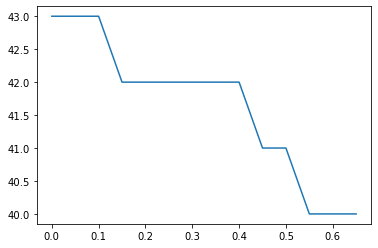

In [31]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
#split data into inputs
#data=df_float.values
#X=data[:,:]
#define thresholds to check
thresholds = arange(0.0,0.7,0.05)
#apply transform with each treshold
results=list()
for t in thresholds:
    #define the transform
    transform = VarianceThreshold(threshold=t)
    #transform the input data
    X_sel=transform.fit_transform(X)
    #determine the number of input features
    n_features=X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' %(t,n_features))
    #store the result
    results.append(n_features)
#plot the theshold vs the number of selected features
plt.plot(thresholds,results)
plt.show()

In [32]:
#new set of selected features
X=X_sel
print(X.shape)

(303784, 40)


# Create Machine Learning Models

### a) Grid search with Logistic Regression (GS-LR)

In [33]:
# grid search class weights with logistic regression for imbalanced classification

model = LogisticRegression(solver='lbfgs',max_iter=1000)
# define grid
balance = [{0:0.001,1:1.0},{0:0.01,1:1.0}, {0:0.1,1:1}, {0:1,1:100},{0:1,1:200}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.906195 using {'class_weight': {0: 1, 1: 100}}
0.905788 (0.101499) with: {'class_weight': {0: 0.001, 1: 1.0}}
0.892030 (0.074420) with: {'class_weight': {0: 0.01, 1: 1.0}}
0.889089 (0.077827) with: {'class_weight': {0: 0.1, 1: 1}}
0.906195 (0.075850) with: {'class_weight': {0: 1, 1: 100}}
0.903427 (0.093013) with: {'class_weight': {0: 1, 1: 200}}


C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
## split into train test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#evaluating a class-weighted logistic regression algorithm on the imbalanced classiffication dataset
#listing 16.12

weights = {0: 0.01, 1: 1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights,max_iter=2000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROCAUC score: 0.49999176561650827
Accuracy score: 0.9993910166729759
F1 score: 0.0
Recall score: 0.0
Precision score: 0.0
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     60721
     class 1       0.00      0.00      0.00        36

    accuracy                           1.00     60757
   macro avg       0.50      0.50      0.50     60757
weighted avg       1.00      1.00      1.00     60757



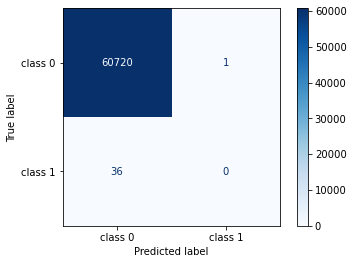

In [33]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Recall score:',recall_score(y_test, y_pred))
print('Precision score:',precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(model, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues);

 ### b) Logistic Regression with Synthetic minority over-sampleing technique (LR+SMOTE)

In [42]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
X_smote , y_smote = smote.fit_resample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 303587, 1: 197})
Resample dataset shape: Counter({0: 303587, 1: 303587})


In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smote, y_smote, test_size =0.20, random_state=42)

In [44]:
model2=LogisticRegression(solver='lbfgs',max_iter=2000)
model2.fit(X_train2, y_train2)
y_pred2=model2.predict(X_test2)

C:\Users\pvelarde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROCAUC score: 0.9948876633502917
Accuracy score: 0.9948943879441676
F1 score: 0.9949208637808433
Recall score: 0.9978145488604433
Precision score: 0.9920439136756465
              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99     60578
     class 1       0.99      1.00      0.99     60857

    accuracy                           0.99    121435
   macro avg       0.99      0.99      0.99    121435
weighted avg       0.99      0.99      0.99    121435



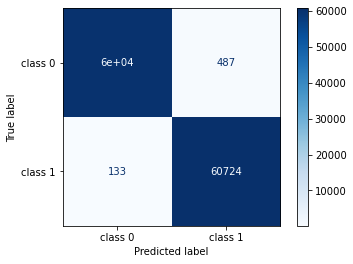

In [45]:
print('ROCAUC score:',roc_auc_score(y_test2, y_pred2))
print('Accuracy score:',accuracy_score(y_test2, y_pred2))
print('F1 score:',f1_score(y_test2, y_pred2))
print('Recall score:',recall_score(y_test2, y_pred2))
print('Precision score:',precision_score(y_test2, y_pred2))

print(classification_report(y_test2, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, X_test2, y_test2, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Support Vector Machine (W-SVM)

In [47]:
#train a model using Penalized-SVM on the original imbalanced dataset:
#https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
# we can add class_weight='balanced' to add panalize mistake
model_SVM = SVC(class_weight='balanced', probability=True)
model_SVM.fit(X_train, y_train)
y_pred_SVM = model_SVM.predict(X_test)

In [48]:
y_pred_SVM = model_SVM.predict(X_test)

ROCAUC score: 0.5230562737767823
Accuracy score: 0.04667774906595125
F1 score: 0.0012415291500698358
Recall score: 1.0
Precision score: 0.0006211501630519178
              precision    recall  f1-score   support

     class 0       1.00      0.05      0.09     60721
     class 1       0.00      1.00      0.00        36

    accuracy                           0.05     60757
   macro avg       0.50      0.52      0.04     60757
weighted avg       1.00      0.05      0.09     60757



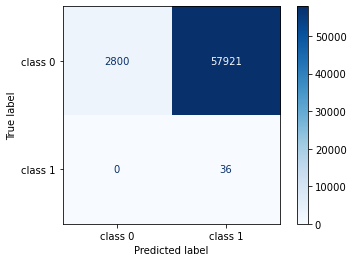

In [49]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred_SVM))
print('Accuracy score:',accuracy_score(y_test, y_pred_SVM))
print('F1 score:',f1_score(y_test, y_pred_SVM))
print('Recall score:',recall_score(y_test, y_pred_SVM))
print('Precision score:',precision_score(y_test, y_pred_SVM))

print(classification_report(y_test, y_pred_SVM, target_names=target_names))
plot_confusion_matrix(model_SVM, X_test, y_test, display_labels=target_names,cmap=plt.cm.Blues);

# Undersampling using CNN
Condensed Nearest Neighbor (CNN) is used to remove redundant examples from the interior of the density of the majority class. 

In [34]:
# undersample an imbalanced dataset with the Condensed Nearest Neighbor Rule pp.148
from imblearn.under_sampling import CondensedNearestNeighbour

In [35]:
counter = Counter(y)
print(counter)

Counter({0: 303587, 1: 197})


In [36]:
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
Xu, yu = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(yu)
print(counter)

Counter({1: 197, 0: 124})


### d) Weighted Decision Tree with Condensed Nearest Neighbor (DT+CNN)
The `DecisionTreeClassifier` class provides the class weight argument that can be speci ed as a model hyperparameter. The class weight is a dictionary that de nes each class label (e.g. 0 and 1) and the weighting to apply in the calculation of group purity for splits in the decision tree when tting the model.

In [37]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xu, yu, test_size =0.20, random_state=42)

In [54]:
# define model
model_DT = DecisionTreeClassifier(class_weight='balanced')
#model performance
model_DT.fit(X_train3, y_train3)
y_pred_DT=model_DT.predict(X_test3)

ROCAUC score: 0.9827586206896552
Accuracy score: 0.9846153846153847
F1 score: 0.9863013698630138
Recall score: 1.0
Precision score: 0.972972972972973
              precision    recall  f1-score   support

     class 0       1.00      0.97      0.98        29
     class 1       0.97      1.00      0.99        36

    accuracy                           0.98        65
   macro avg       0.99      0.98      0.98        65
weighted avg       0.99      0.98      0.98        65



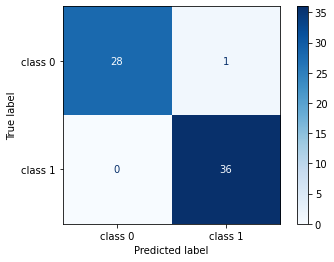

In [55]:
print('ROCAUC score:',roc_auc_score(y_test3, y_pred_DT))
print('Accuracy score:',accuracy_score(y_test3, y_pred_DT))
print('F1 score:',f1_score(y_test3, y_pred_DT))
print('Recall score:',recall_score(y_test3, y_pred_DT))
print('Precision score:',precision_score(y_test3, y_pred_DT))

print(classification_report(y_test3, y_pred_DT, target_names=target_names))
plot_confusion_matrix(model_DT, X_test3, y_test3, display_labels=target_names,cmap=plt.cm.Blues);

### e) Support Vector Machine with Condensed Nearest Neighbor (SVM+CNN)

In [42]:
model_SVM_cnn = SVC()
model_SVM_cnn.fit(X_train3, y_train3)
y_pred_SVM_cnn = model_SVM_cnn.predict(X_test3)

In [ ]:
print('ROCAUC score:',roc_auc_score(y_test3, y_pred_SVM_cnn))
print('Accuracy score:',accuracy_score(y_test3, y_pred_SVM_cnn))
print('F1 score:',f1_score(y_test3, y_pred_SVM_cnn))
print('Recall score:',recall_score(y_test3, y_pred_SVM_cnn))
print('Precision score:',precision_score(y_test3, y_pred_SVM_cnn))

print(classification_report(y_test3, y_pred_SVM_cnn, target_names=target_names))
plot_confusion_matrix(model_SVM_cnn, X_test3, y_test3, display_labels=target_names,cmap=plt.cm.Blues);